1. 데이터 처리

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection._split import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

iris = datasets.load_iris() # Iris 데이터 불러오기
print(iris.data[:3])
print(np.corrcoef(iris.data[:, 2], iris.data[:, 3]))  # 상관관계 보기
"""
[[1.         0.96286543]
 [0.96286543 1.        ]]
"""

x = iris.data[:, [2, 3]] # feature(독립변수, x) : petal length, petal width
y = iris.target  # label, class
print(type(x), type(y), x.shape, y.shape)  # x는 2차원(150, 2)  y는 1차원(150,)
print(set(y))  # {0, 1, 2}

print('-----------------train / test 분리 - 오버피팅(과적합)방지-----------------------')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)  # (105, 2) (45, 2) (105,) (45,)

# scaling(표준화)
print(x_train[:3])
sc = StandardScaler()
sc.fit(x_test)
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)  # 표준화 완성
print(x_train[:3])

# 표준화 값을 원래 값으로 복귀
# inver_x_train = sc.inverse_transform(x_train)
# print(inver_x_train[:3])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
[[1.         0.96286543]
 [0.96286543 1.        ]]
<class 'numpy.ndarray'> <class 'numpy.ndarray'> (150, 2) (150,)
{0, 1, 2}
-----------------train / test 분리 - 오버피팅(과적합)방지-----------------------
(105, 2) (45, 2) (105,) (45,)
[[3.5 1. ]
 [5.5 1.8]
 [5.7 2.5]]
[[-0.18295039 -0.29318114]
 [ 0.93066067  0.7372463 ]
 [ 1.04202177  1.63887031]]


2. 분류 모델 설정

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# 분류 모델
# logit(), glm() : 이항분류 - 활성화 함수 - sigmoid
# LogisticRegression : 다항분류 - 활성화 함수 : softmax
# C속성 : 분류정확도를 조절하기 위해 모델에 패널티를 적용(L2정규화)-과적합 방지
model = LogisticRegression(C = 1.0, random_state = 0)

#model = svm.SVC()
#model = svm.SVC(C=1)
model = svm.LinearSVC(C=1)

# 의사결정 나무
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)

# RandomForestClassifier 모델
model= RandomForestClassifier(n_estimators = 500, criterion = 'entropy', n_jobs = 2)#n_jobs는 병렬처리

LogisticRegression(random_state=0)

In [ ]:
model.fit(x_train, y_train) # 지도학습

예측값 :  [2 1 0 2 0 2 0 1 1 1 1 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]
예측값 :  [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]
총 개수 : 45, 오류수 : 2

분류 정확도 출력1 : 0.956
실제치   0   1   2
예측치            
0    16   0   0
1     0  17   1
2     0   1  10
분류 정확도 출력2 :  0.9555555555555556
분류 정확도 출력3 :  0.9555555555555556
분류 정확도 출력4 :  0.9523809523809523
새로운 값으로 예측 :  [1 0 2]


<ipython-input-4-28b2da245d8a>:57: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], c=cmap(idx), marker=markers[idx], label=cl)


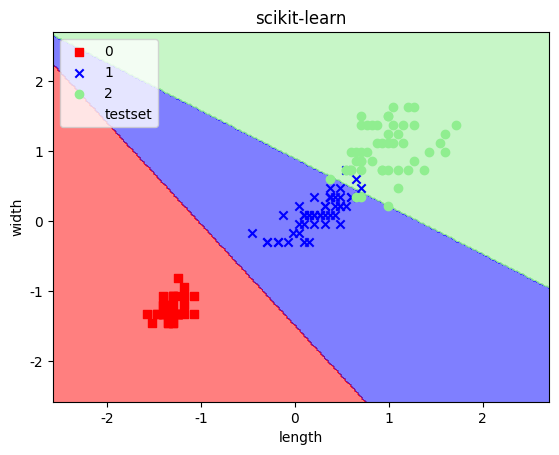

In [4]:
# 분류 예측
y_pred = model.predict(x_test)  # 검정자료는 test
print('예측값 : ', y_pred)
print('예측값 : ', y_test)

# 분류 정확도
print('총 개수 : %d, 오류수 : %d'%(len(y_test), (y_test != y_pred).sum()))
print()
print('분류 정확도 출력1 : %.3f'%accuracy_score(y_test, y_pred))

# 각 데이터별 분류 정확도
con_mat = pd.crosstab(y_test, y_pred, rownames = ['예측치'], colnames=['실제치'])
print(con_mat)
print('분류 정확도 출력2 : ', (con_mat[0][0] + con_mat[1][1] + con_mat[2][2]) / len(y_test))
print('분류 정확도 출력3 : ', model.score(x_test, y_test))
print('분류 정확도 출력4 : ', model.score(x_train, y_train))

# 새로운 값으로 예측
new_data = np.array([[5.1, 2.4], [1.1, 1.4], [8.1, 8.4]])

# 표준화
sc.fit(new_data)
new_data = sc.transform(new_data)
new_pred = model.predict(new_data)
print('새로운 값으로 예측 : ', new_pred)  # 새로운 값으로 예측 :  [1 0 2]

#* 붓꽃 자료에 대한 로지스틱 회귀 결과를 차트로 그리기 *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import font_manager, rc
# plt.rc('font', family='malgun gothic')
plt.rcParams['axes.unicode_minus']= False

def plot_decision_region(X, y, classifier, test_idx=None, resolution=0.02, title=''):
    markers = ('s', 'x', 'o', '^', 'v')  # 점 표시 모양 5개 정의
    colors = ('r', 'b', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    #print('cmap : ', cmap.colors[0], cmap.colors[1], cmap.colors[2])

    # decision surface 그리기
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    xx, yy = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # xx, yy를 ravel()를 이용해 1차원 배열로 만든 후 전치행렬로 변환하여 퍼셉트론 분류기의
    # predict()의 인자로 입력하여 계산된 예측값을 Z로 둔다.
    Z = classifier.predict(np.array([xx.ravel(), yy.ravel()]).T)
    Z = Z.reshape(xx.shape)   # Z를 reshape()을 이용해 원래 배열 모양으로 복원한다.

    # X를 xx, yy가 축인 그래프 상에 cmap을 이용해 등고선을 그림
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    X_test = X[test_idx, :]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], c=cmap(idx), marker=markers[idx], label=cl)

    if test_idx:
        X_test = X[test_idx, :]
        plt.scatter(X_test[:, 0], X_test[:, 1], c=[], linewidth=1, marker='o', s=80, label='testset')

    plt.xlabel('length')
    plt.ylabel('width')
    plt.legend(loc=2)
    plt.title(title)
    plt.show()

x_combined_std = np.vstack((x_train, x_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_region(X=x_combined_std, y=y_combined, classifier=model, test_idx=range(105, 150), title='scikit-learn')